In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #visualizing data
%matplotlib inline
import seaborn as sns

Load the **Dataset**

In [3]:
data = pd.read_csv('/content/Sales Data.csv',)

Data Exploration and Cleaning
Explore the Data: Get a basic understanding of the data structure. **bold text:**

In [4]:
# Display the first few rows of the dataset
data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12.0,1700.00,New York City,0.0
1,1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12.0,600.00,New York City,7.0
2,2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12.0,11.95,New York City,18.0
3,3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12.0,149.99,San Francisco,15.0
4,4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12.0,11.95,Atlanta,12.0


In [5]:
# Get the shape of the dataset
data.shape

(130193, 11)

In [6]:
# Get summary statistics
data.describe()

,Unnamed: 0,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour
count,130193.000000,130193.000000,130192.000000,130192.000000,130192.000000,130192.000000,130192.000000
mean,8665.856421,233856.079705,1.124309,184.331614,7.303444,185.417506,14.409180
std,5597.647405,55397.830935,0.442795,332.799722,3.720713,332.977677,5.411649
min,0.000000,150502.000000,1.000000,2.990000,1.000000,2.990000,0.000000
25%,4089.000000,181755.000000,1.000000,11.950000,4.000000,11.950000,11.000000
50%,8176.000000,239673.000000,1.000000,14.950000,8.000000,14.950000,15.000000
75%,12344.000000,288422.000000,1.000000,150.000000,11.000000,150.000000,19.000000
max,25116.000000,319670.000000,8.000000,1700.000000,12.000000,3400.000000,23.000000


In [7]:
# Check for missing values
data.isnull().sum()

,0
Unnamed: 0,0
Order ID,0
Product,0
Quantity Ordered,1
Price Each,1
Order Date,1
Purchase Address,1
Month,1
Sales,1
City,1


In [8]:
 print(data.columns)

Index(['Unnamed: 0', 'Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Order Date', 'Purchase Address', 'Month', 'Sales', 'City', 'Hour'],
      dtype='object')


Clean the Data: Handle missing values, incorrect data types, or outliers as needed.**bold text**

In [9]:
# Example: Filling missing values
data['Sales'].fillna(data['Sales'].mean(), inplace=True)

Data Visualization
Visualize Sales Trends Over Time: Use line plots to visualize sales trends.**bold text**

In [10]:
import pandas as pd

# Attempt to convert 'Order Date' to datetime
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')

# Check if any conversion failed
missing_dates = data['Order Date'].isna().sum()

if missing_dates > 0:
    print(f"Found {missing_dates} rows with invalid dates. Dropping them.")
    # Drop rows where 'Order Date' could not be converted
    data.dropna(subset=['Order Date'], inplace=True)


Found 1 rows with invalid dates. Dropping them.


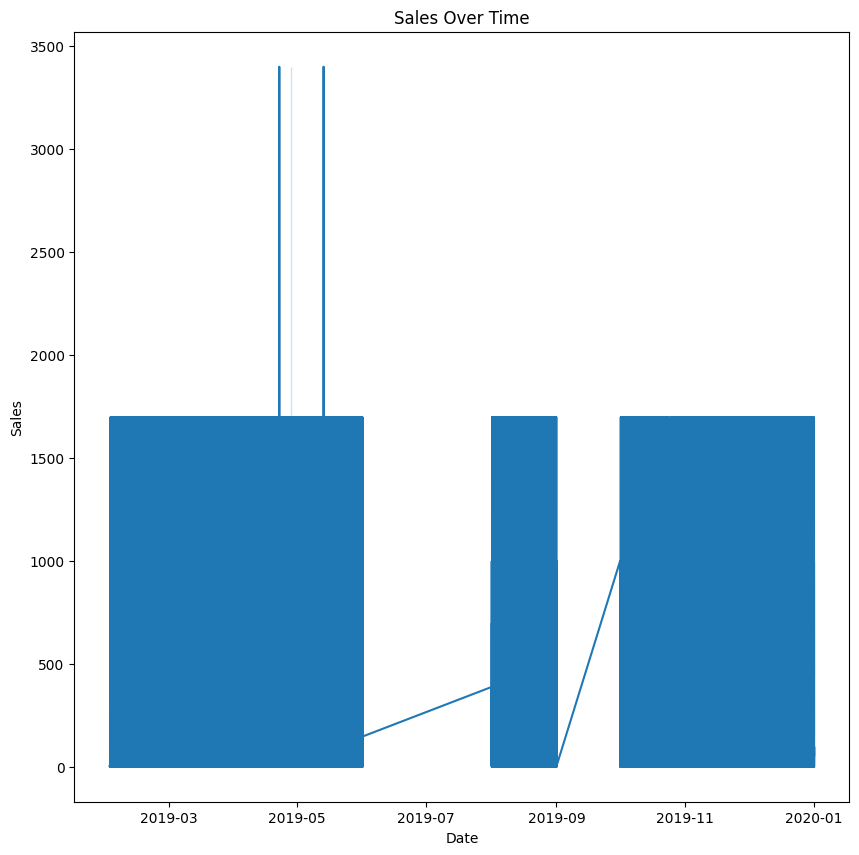

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Order Date' is in datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Plot sales over time
plt.figure(figsize=(10, 10))
sns.lineplot(x='Order Date', y='Sales', data=data)
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


Analyze Sales by Category/Region/Segment: Use bar plots or pie charts to analyze sales by different categories.**bold text**

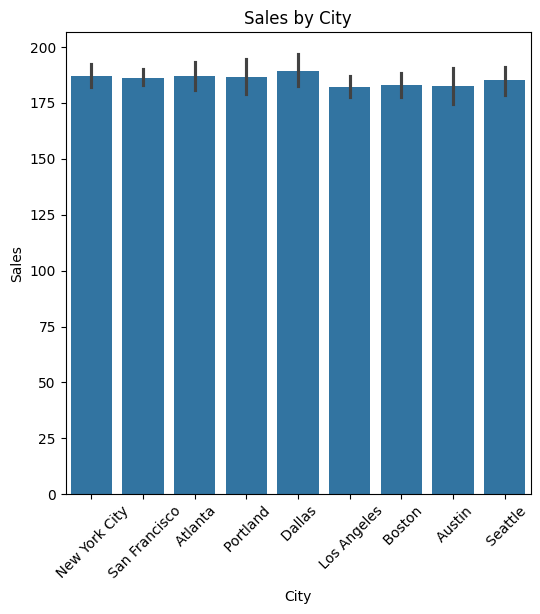

In [15]:
# Sales by city
plt.figure(figsize=(6, 6))
sns.barplot(x='City', y='Sales', data=data)
plt.title('Sales by City')
plt.xlabel('City')
plt.ylabel('Sales')
plt.xticks(rotation=45)  # Rotate the x labels for better readability
plt.show()


Time Series Analysis
Decompose the Time Series: Decompose the time series to observe trend, seasonality, and noise.**bold text**

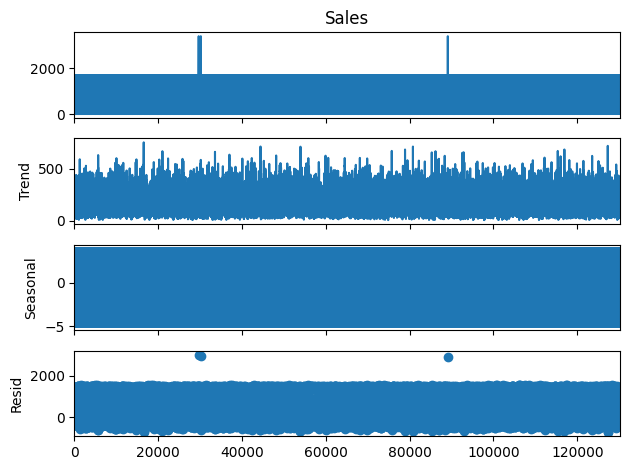

In [16]:
# Decompose the time series
decomposition = seasonal_decompose(data['Sales'], model='additive', period=12)

# Plot the decomposition
decomposition.plot()
plt.show()

Perform Forecasting: Use simple forecasting techniques like moving averages or more complex models like ARIMA.**bold text**

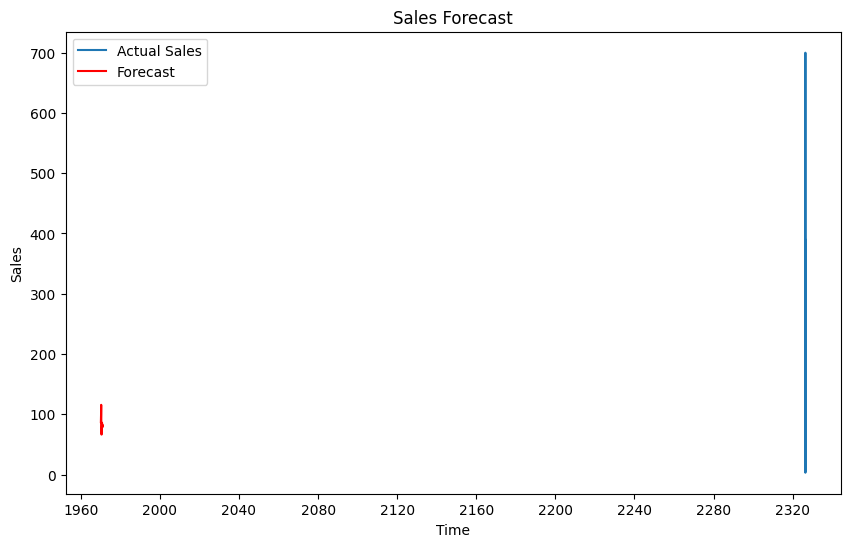

In [19]:
# Fit ARIMA model
model = ARIMA(data['Sales'], order=(5, 1, 0))
model_fit = model.fit()

# Make predictions
forecast = model_fit.forecast(steps=12)

# Generate future dates for forecast
future_dates = pd.date_range(start=data.index[-1], periods=13, freq='M')[1:]

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(data.index[-12:], data['Sales'].tail(12), label='Actual Sales')  # Last 12 months of actual sales
plt.plot(future_dates, forecast, label='Forecast', color='red')
plt.title('Sales Forecast')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()

Customer Segmentation
Segment Customers Based on Sales Data: Use clustering algorithms to segment customers.**bold text**

Index(['Unnamed: 0', 'Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Order Date', 'Purchase Address', 'Month', 'Sales', 'City', 'Hour'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


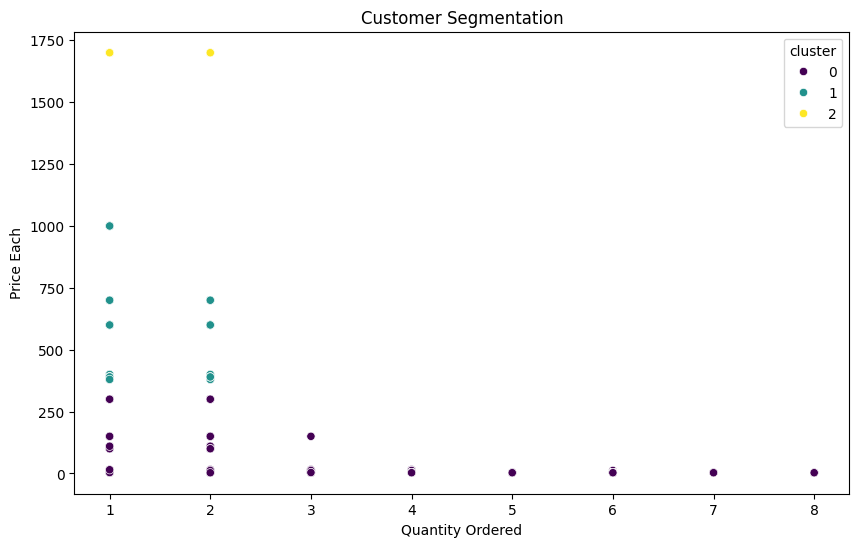

In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Print column names to find the correct features
print(data.columns)

# Prepare data for clustering (replace 'feature_1' and 'feature_2' with actual column names)
X = data[['Quantity Ordered', 'Price Each']]

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(X)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity Ordered', y='Price Each', hue='cluster', data=data, palette='viridis')
plt.title('Customer Segmentation')
plt.show()


Insights and Reporting
Summarize Key Insights: Highlight the main findings from your analysis, such as trends, anomalies, and segments.

Create a Dashboard or Report: Use tools like Tableau, Power BI, or even Matplotlib and Seaborn to create visual reports.**bold text**

In [23]:
# Example of a summary report in Jupyter Notebook
print("Total Sales:", data['Sales'].sum())
print("Average Sales per Customer:", data['Sales'].mean())


Total Sales: 24139875.979999997
Average Sales per Customer: 185.41750629839004
